# HURACAN MARIA - VELOCIDAD Y PRESION

Mostrar en una gráfica de eje X compartido la evolución de la velocidad (Y izq) y de la presión (Y der) a lo largo del
tiempo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages

In [2]:
dfHu = pd.read_csv("huracan_maria.csv", sep=";")

In [3]:
dfHu

,FECHA,HORA,LATITUD,LONGITUD,NUDOS,PRESION
0,sep-16,15:00 GMT,12.2,-50.5,35,1008
1,sep-16,18:00 GMT,11.9,-51.6,35,1006
2,sep-16,21:00 GMT,12.3,-52.6,50,1002
3,sep-17,00:00 GMT,12.4,-53.0,50,1002
4,sep-17,03:00 GMT,12.5,-53.7,50,1002
...,...,...,...,...,...,...
115,sep-29,21:00 GMT,37.8,-57.4,60,988
116,sep-30,03:00 GMT,38.6,-53.9,60,988
117,sep-30,09:00 GMT,39.6,-50.5,60,988
118,sep-30,15:00 GMT,40.7,-47.2,60,989


In [4]:
dfHu['FECHA_HORA'] = dfHu.FECHA + " 2005 " + dfHu.HORA.str.replace(" GMT","")
dfHu

,FECHA,HORA,LATITUD,LONGITUD,NUDOS,PRESION,FECHA_HORA
0,sep-16,15:00 GMT,12.2,-50.5,35,1008,sep-16 2005 15:00
1,sep-16,18:00 GMT,11.9,-51.6,35,1006,sep-16 2005 18:00
2,sep-16,21:00 GMT,12.3,-52.6,50,1002,sep-16 2005 21:00
3,sep-17,00:00 GMT,12.4,-53.0,50,1002,sep-17 2005 00:00
4,sep-17,03:00 GMT,12.5,-53.7,50,1002,sep-17 2005 03:00
...,...,...,...,...,...,...,...
115,sep-29,21:00 GMT,37.8,-57.4,60,988,sep-29 2005 21:00
116,sep-30,03:00 GMT,38.6,-53.9,60,988,sep-30 2005 03:00
117,sep-30,09:00 GMT,39.6,-50.5,60,988,sep-30 2005 09:00
118,sep-30,15:00 GMT,40.7,-47.2,60,989,sep-30 2005 15:00


In [5]:
dfHu['FECHA_HORA'] = pd.to_datetime(dfHu['FECHA_HORA'], infer_datetime_format=True)
dfHu

,FECHA,HORA,LATITUD,LONGITUD,NUDOS,PRESION,FECHA_HORA
0,sep-16,15:00 GMT,12.2,-50.5,35,1008,2005-09-16 15:00:00
1,sep-16,18:00 GMT,11.9,-51.6,35,1006,2005-09-16 18:00:00
2,sep-16,21:00 GMT,12.3,-52.6,50,1002,2005-09-16 21:00:00
3,sep-17,00:00 GMT,12.4,-53.0,50,1002,2005-09-17 00:00:00
4,sep-17,03:00 GMT,12.5,-53.7,50,1002,2005-09-17 03:00:00
...,...,...,...,...,...,...,...
115,sep-29,21:00 GMT,37.8,-57.4,60,988,2005-09-29 21:00:00
116,sep-30,03:00 GMT,38.6,-53.9,60,988,2005-09-30 03:00:00
117,sep-30,09:00 GMT,39.6,-50.5,60,988,2005-09-30 09:00:00
118,sep-30,15:00 GMT,40.7,-47.2,60,989,2005-09-30 15:00:00


In [6]:
X = dfHu['FECHA_HORA']
Y1 = dfHu['NUDOS']
Y2 = dfHu['PRESION']


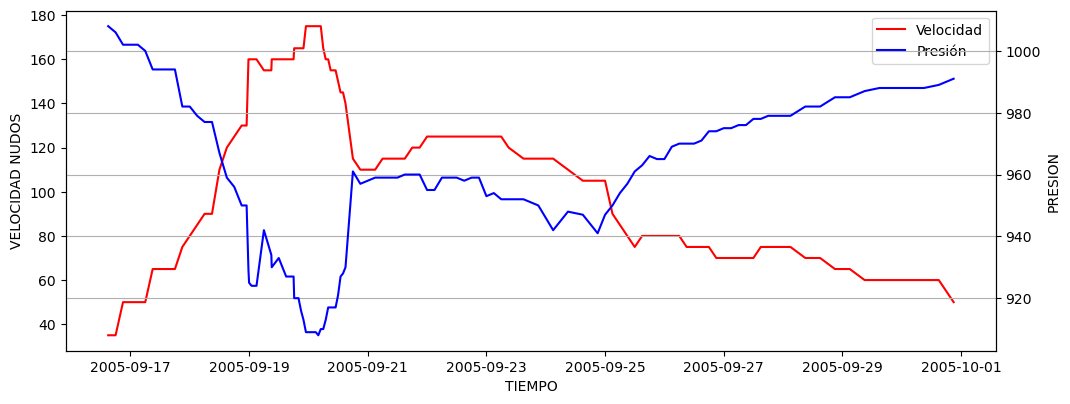

In [8]:
fig = plt.figure(figsize=(12,5))
fig.autofmt_xdate(rotation=45)
ax1 = fig.add_subplot(111)

linea1 = ax1.plot(X,Y1, color="red", label="Velocidad")
ax1.set_xlabel("TIEMPO")
ax1.set_ylabel("VELOCIDAD NUDOS")


ax2 = ax1.twinx()  # Compartir el eje X
linea2 = ax2.plot(X, Y2, color="blue", label="Presión")
ax2.set_ylabel("PRESION")

# La layenda:
lineas = linea1 + linea2
labels = [l.get_label() for l in lineas]
ax1.legend(lineas, labels, loc=0)

plt.grid(True)
plt.show();

EXPORTAR A PDF

In [ ]:
pdf = PdfPages("huracan_maria_vel_pre.pdf")
pdf.savefig(fig)
pdf.close()